# OpenSeeD embedding test
This notebook demonstrates how to obtain text and pixel embeddings using the utilities in the `tools` package.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

# --- 1. Set up system paths using the correct method for a notebook ---
# This is the boilerplate you provided initially, and it is correct.
NB_DIR = os.getcwd() # Use os.getcwd() in notebooks, not __file__
OPENSEED_ROOT = os.path.abspath(os.path.join(NB_DIR, '..', 'OpenSeeD'))
TOOLS_DIR = os.path.join(OPENSEED_ROOT, 'tools')

for p in (TOOLS_DIR, OPENSEED_ROOT):
    if p not in sys.path:
        sys.path.insert(0, p)

# --- 2. Import the functions from your tool script ---
# This part remains the same.
from openseed_inference import (
    load_openseed_model,
    segment_with_embeddings,
    visualize_segmentation
)

/home/jovyan/teaching_material/msc/envs/vlmaps6/lib/python3.8/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [2]:
CFG_FILE = 'configs/openseed/openseed_swint_lang.yaml'
WGT_FILE = 'weights/model_state_dict_swint_51.2ap.pt'
CLASSES    = ["floor","ceiling","wall","chair","picture","table","door","other"]

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model  = load_openseed_model(CFG_FILE, WGT_FILE, device)

/home/jovyan/teaching_material/msc/envs/vlmaps6/lib/python3.8/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


self.task_switch  {'coco': True, 'o365': False}


Segmentation map shape : (720, 1080)
Text embedding shape  : (8, 512)
Visual embedding shape: (768,)


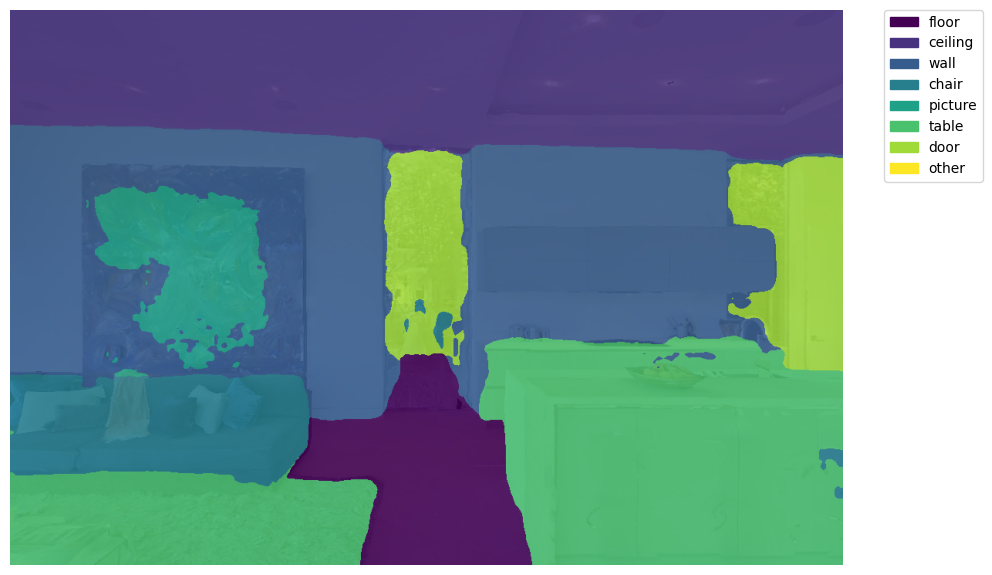

In [10]:
IMAGE_PATH = "/home/jovyan/teaching_material/msc/MSc-Thesis/data/5LpN3gDmAk7_1/rgb/5LpN3gDmAk7_135.png"

# 4) Run segmentation + both embeddings
seg_map, text_embs, visual_emb = segment_with_embeddings(
    model,
    IMAGE_PATH,
    CLASSES
)

# 5) Inspect shapes
print("Segmentation map shape :", seg_map.shape)    # (H, W)
print("Text embedding shape  :", text_embs.shape)   # (K, C)
print("Visual embedding shape:", visual_emb.shape)  # (C,)

# 6) (Optional) Visualize the segmentation
visualize_segmentation(IMAGE_PATH, seg_map, CLASSES, alpha=0.85)